In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [2]:
#Read dataset, divide it into train and test set
dataset = pd.read_csv("train.csv")
dataset.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption


In [3]:
# Selecting Heart Rate Variability (HRV) features
dataset = dataset[['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'condition']]

dataset.loc[dataset["condition"] == "no stress","condition"] = 1
dataset.loc[dataset["condition"] == "interruption","condition"] = 2
dataset.loc[dataset["condition"] == "time pressure","condition"] = 3

Y = pd.get_dummies(dataset["condition"])
#dataset = pd.concat([dataset,Y],axis = 1)
dataset = dataset.drop(columns = ["condition"])
dataset.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,36.260015,90.239711,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,66.424024,98.336849,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,47.933575,99.233584,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.722743,96.641348,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,9.871963,93.707747,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098


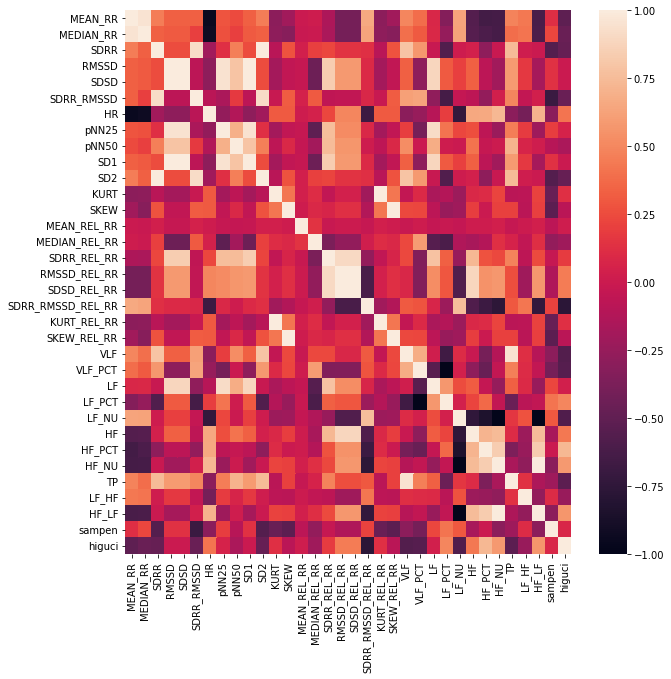

In [4]:
corr_mat = dataset.corr()
fig = plt.figure(figsize = (10, 10))
sns.heatmap(corr_mat)
plt.show()


In [5]:
corr_features_set = set()
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i,j]) > 0.9 or abs(corr_mat.iloc[i,j]) < -0.9:
            corr_features_set.add(corr_mat.columns[i])
print("Number of Heavily Correlated Features are ", len(corr_features_set))
dataset.head()
print("These Features are, \n", corr_features_set)
print("These Features will be dropped")
dataset.drop(labels = corr_features_set, axis = 1, inplace = True)

# Adding lables
dataset = pd.concat([dataset,Y],axis = 1)

Number of Heavily Correlated Features are  15
These Features are, 
 {'TP', 'pNN25', 'LF', 'KURT_REL_RR', 'SD2', 'SDRR_RMSSD', 'SKEW_REL_RR', 'HR', 'HF_NU', 'SD1', 'LF_PCT', 'SDSD_REL_RR', 'SDSD', 'HF_LF', 'MEDIAN_RR'}
These Features will be dropped


In [6]:
dataset = dataset.to_numpy()
dataset = dataset.astype("float")

np.random.shuffle(dataset)

len_dataset = dataset.shape[0]

N = dataset.shape[0]
p = dataset.shape[1] - 3
out_neurons = 3
print("Original Dataset shape ",dataset.shape)
print("Training set shape ",N,p)

Original Dataset shape  (41033, 22)
Training set shape  41033 19


In [7]:
# Standardize the dataset
X = dataset[:,:p]
# Store mean and std in a dictionary to use again for test set
mean_and_std = {}
for i in range(p):
    mean_and_std["mean"+str(i)] = np.mean(X[:,i])
    mean_and_std["std"+str(i)] = np.std(X[:,i])
# Now standardizing the training set
for i in range(p):
    X[:,i] = (X[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]

Y = dataset[:,p:]

#ones = np.asmatrix(np.ones(len(X))).T
#X = np.hstack((ones,X))
#N,p = X.shape

dataset = np.concatenate((X,Y),axis = 1)
print("Training set shape ",dataset.shape)

Training set shape  (41033, 22)


In [8]:
def create_batches(dataset,batch_size = 64):
    batches = {}
    len_dataset = dataset.shape[0]
    start = 0
    end = batch_size
    no_of_batches = int(len_dataset/batch_size)
    for i in range(no_of_batches):
        X_and_t = dataset[start:end,:]
        batches["batch_" + str(i)] = X_and_t
        start = start + batch_size
        end = end + batch_size
    
    # To take into account last remaining datapoints in case (len_dataset/batch_size) is a float 
    if len_dataset % batch_size != 0:
        st = (batch_size*no_of_batches)
        batches["batch_" + str(i+1)] = dataset[st:,:]
    return batches

In [9]:
# Function to calculate cost
def compute_cost(h,Y):
    N = Y.shape[0]
    logprobs = np.multiply(Y,np.log(h)) + np.multiply(1-Y,np.log(1-h))
    cost = (-1/N)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # return [[17]] as 17
    return cost

In [10]:
def sigmoid(x):
    return ((1)/(1+np.exp(-x)))

def sigmoid_derivative(x):
    result = np.multiply(sigmoid(x) , (1-sigmoid(x)))
    return(result)

In [11]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num,axis = 0,keepdims = True)
    return (num / den)

In [12]:
# Neural Network Model parameters initialization function, parameters to be saved in a dictionary
def parameter_init(layers):
    parameters = {}
    total_params = 0
    for i in range(1,len(layers)):
        parameters["W"+str(i)] = 0.01*np.random.randn(layers[i],layers[i-1])
        parameters["b"+str(i)] = np.zeros((layers[i],1))
        print("Dense Layer : ",i, "\tSize : ",(layers[i],layers[i-1]), "Params:", (layers[i]*layers[i-1])+layers[i] )
        total_params = total_params + (layers[i]*layers[i-1])+layers[i]
    print("Total Trainable Parameters : ", total_params)
    return (parameters)

In [13]:
# Structure of Neural network, saved into a list to modify easily
structure = [p,12,6,out_neurons]

# Initialize parameters
parameters = parameter_init(structure)

Dense Layer :  1 	Size :  (12, 19) Params: 240
Dense Layer :  2 	Size :  (6, 12) Params: 78
Dense Layer :  3 	Size :  (3, 6) Params: 21
Total Trainable Parameters :  339


100%|██████████| 90/90 [00:19<00:00,  4.51it/s]

Training Cost 1.1835147223777351


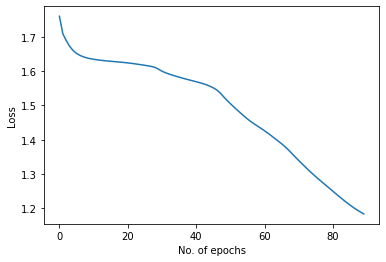

In [14]:
# Implementation of Network using Gradient Descent ADAM optimizer
epochs = 90
alpha = 0.0005
costs = []

batch_data = create_batches(dataset,batch_size = 64)
no_of_batches = len(batch_data)

t = 0
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

mW3 = np.zeros_like(parameters["W3"])
mb3 = np.zeros_like(parameters["b3"])
vW3 = np.zeros_like(parameters["W3"])
vb3 = np.zeros_like(parameters["b3"])

mW2 = np.zeros_like(parameters["W2"])
mb2 = np.zeros_like(parameters["b2"])
vW2 = np.zeros_like(parameters["W2"])
vb2 = np.zeros_like(parameters["b2"])

mW1 = np.zeros_like(parameters["W1"])
mb1 = np.zeros_like(parameters["b1"])
vW1 = np.zeros_like(parameters["W1"])
vb1 = np.zeros_like(parameters["b1"])


for num in tqdm(range(epochs)):
    cost_total = 0
    for ba in range(no_of_batches):
        dat = batch_data["batch_"+str(ba)]
        X = dat[:,:p]
        Y = dat[:,p:]
        N = X.shape[0]

        #Forward Propogation
        a1 = np.dot(parameters["W1"],X.T) + parameters["b1"]
        h1 = sigmoid(a1)
        a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
        h2 = sigmoid(a2)
        a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
        h3 = softmax(a3)
        # Gradients for Backpropogation
        
        dL_da3 = -( Y.T - h3)
        dL_dW3 = (1/N)*np.dot(dL_da3 , h2.T)
        dL_db3 = (1/N)*(np.sum(dL_da3,axis=1,keepdims = True))
        
        dL_dh2 = np.dot(parameters["W3"].T , dL_da3)
        dL_da2 = np.multiply(dL_dh2,sigmoid_derivative(a2))
        dL_dW2 = (1/N)*np.dot(dL_da2 , h1.T)
        dL_db2 = (1/N)*(np.sum(dL_da2,axis=1,keepdims = True))
        
        dL_dh1 = np.dot(parameters["W2"].T , dL_da2)
        dL_da1 = np.multiply(dL_dh1,sigmoid_derivative(a1))
        dL_dW1 = (1/N)*np.dot(dL_da1 , X)
        dL_db1 = (1/N)*(np.sum(dL_da1,axis = 1,keepdims = True))
        
        # GD Updates
        t = t + 1     # For Adam
    
        mW3 =  (beta1*mW3) + ((1-beta1)*dL_dW3)
        vW3 =  (beta2*vW3) + ((1-beta2)*np.square(dL_dW3))
        mW3_correct = mW3/(1-np.power(beta1,t))
        vW3_correct = vW3/(1-np.power(beta2,t))
        parameters["W3"] = parameters["W3"] - alpha*(mW3_correct/np.sqrt(vW3_correct + epsilon))
        
        mb3 =  (beta1*mb3) + ((1-beta1)*dL_db3)
        vb3 =  (beta2*vb3) + ((1-beta2)*np.square(dL_db3))
        mb3_correct = mb3/(1-np.power(beta1,t))
        vb3_correct = vb3/(1-np.power(beta2,t))
        parameters["b3"] = parameters["b3"] - alpha*(mb3_correct/np.sqrt(vb3_correct + epsilon))
        
        mW2 =  (beta1*mW2) + ((1-beta1)*dL_dW2)
        vW2 =  (beta2*vW2) + ((1-beta2)*np.square(dL_dW2))
        mW2_correct = mW2/(1-np.power(beta1,t))
        vW2_correct = vW2/(1-np.power(beta2,t))
        parameters["W2"] = parameters["W2"] - alpha*(mW2_correct/np.sqrt(vW2_correct + epsilon))
        
        mb2 =  (beta1*mb2) + ((1-beta1)*dL_db2)
        vb2 =  (beta2*vb2) + ((1-beta2)*np.square(dL_db2))
        mb2_correct = mb2/(1-np.power(beta1,t))
        vb2_correct = vb2/(1-np.power(beta2,t))
        parameters["b2"] = parameters["b2"] - alpha*(mb2_correct/np.sqrt(vb2_correct + epsilon))
        
        mW1 =  (beta1*mW1) + ((1-beta1)*dL_dW1)
        vW1 =  (beta2*vW1) + ((1-beta2)*np.square(dL_dW1))
        mW1_correct = mW1/(1-np.power(beta1,t))
        vW1_correct = vW1/(1-np.power(beta2,t))
        parameters["W1"] = parameters["W1"] - alpha*(mW1_correct/np.sqrt(vW1_correct + epsilon))
        
        mb1 =  (beta1*mb1) + ((1-beta1)*dL_db1)
        vb1 =  (beta2*vb1) + ((1-beta2)*np.square(dL_db1))
        mb1_correct = mb1/(1-np.power(beta1,t))
        vb1_correct = vb1/(1-np.power(beta2,t))
        parameters["b1"] = parameters["b1"] - alpha*(mb1_correct/np.sqrt(vb1_correct + epsilon))
        
        cost_total = cost_total + compute_cost(h3.T,Y)
    
    cost_avg = (cost_total/no_of_batches)
    costs.append(cost_avg)

plt.plot(costs)
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
#plt.savefig("adam_gd.png")
print("Training Cost",costs[-1])

In [15]:
# Prediction on training set
X = dataset[:,:p]
Y = dataset[:,p:]

k= 173
a1 = np.dot(parameters["W1"],X.T)+ parameters["b1"]
h1 = sigmoid(a1)
a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
h2 = sigmoid(a2)
a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
h3 = softmax(a3)
print("Actual",Y[k],"\t Predicted",h3.T[k])

Actual [0. 1. 0.] 	 Predicted [0.05055966 0.93320985 0.0162305 ]


In [16]:
# Loading Test set
test = pd.read_csv("test.csv")
test = test.drop(columns = ["datasetId"])

test.loc[test["condition"] == "no stress","condition"] = 1
test.loc[test["condition"] == "interruption","condition"] = 2
test.loc[test["condition"] == "time pressure","condition"] = 3
Yt = pd.get_dummies(test["condition"])

# Drop highly correlated features calculated during training
test.drop(labels = corr_features_set, axis = 1, inplace = True)

test = pd.concat([test,Yt],axis = 1)
test.drop(columns = ["condition"], inplace = True)
test = test.to_numpy()
test = test.astype("float64")

# Prediction on test set
Xt = test[:,:p]
Yt = test[:,p:]

# Standardize test set
for i in range(p):
    Xt[:,i] = (Xt[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]


#Forward Propogation
a1t = np.dot(parameters["W1"],Xt.T) + parameters["b1"]
h1t = sigmoid(a1t)
a2t = np.dot(parameters["W2"],h1t) + parameters["b2"]
h2t = sigmoid(a2t)
a3t = np.dot(parameters["W3"],h2t) + parameters["b3"]
h3t = softmax(a3t)
print("Cost of test set",compute_cost(h3t.T,Yt))

Cost of test set nan


In [17]:
y_pred = np.asmatrix(np.argmax(h3t.T,axis = 1)).T
YYYY= np.asmatrix(np.argmax(Yt,axis=1)).T
count = 0
for i in range(len(YYYY)):
    if y_pred[i] != YYYY[i]:
        count = count+1
print("Number of incorrect predictions on test set are",count,"out of",len(YYYY))
print("The accuracy on test set is ",(1-(count/len(YYYY)))*100)

Number of incorrect predictions on test set are 5985 out of 23333
The accuracy on test set is  74.3496335661938
